In [1]:
from pgmpy.models import BayesianNetwork
from pgmpy.factors.discrete.CPD import TabularCPD
from IPython.display import Image
import numpy as np

/home/fsimoes/.virtualenvs/minimal-set-intervention-selection-lcn_Dakt/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# Define CBN

## The graph

In [2]:
net = BayesianNetwork()
net.add_nodes_from(['X1', 'X2', 'X3', 'X4', 'Y', 'W'])
net.add_edges_from(
    [('X1', 'Y'),
     ('X2', 'X1'),
     ('X2', 'X3'),
     ('W', 'X2'),
     ('W', 'X4'),
     ('X4', 'X3'),
     ('X4', 'Y')])

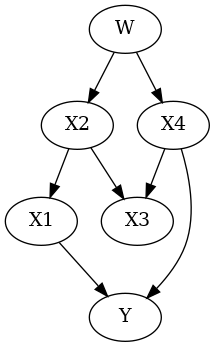

In [3]:
graph = net.to_graphviz()
graph.draw('confounded_m.png', prog='dot')
Image('confounded_m.png')

## The CPDs

In [4]:
# Bernoulli probabilities
bw = 0.5
bxi = 0.1
by = 0.2

#### Structural assignments behind the CPDs:
$$
\begin{cases}
    W \coloneqq N_W \\
    X_2 \coloneqq (W+1 \mod 2) + N_{X_2} \\
    X_4 \coloneqq W + N_{X_4} \\
    X_3 \coloneqq X_2 \lor X_4 + N_{X_3}\\
    X_1 \coloneqq X_2 + N_{X_1}\\
    Y \coloneqq X_1 \land X_4 + N_{Y}\\
    N_{W} \sim \mathrm{Bern}(b_{W}) \\
    N_{X_i} \sim \mathrm{Bern}(b_{X_i}) \\
    N_{Y} \sim \mathrm{Bern}(b_{Y}) 
\end{cases}
$$

Notice that, most of the time, $X_1$ will differ from $X_4$ so that $Y$ will often be $0$.
Interventions on $W$ will not solve this issue.
Nonetheless, setting $X_4$ to $1$ when $W$ is $0$, and to $0$ when $W$ is $1$, will increase the odds that $X_1 = X_4$.
However, there is an even better choice: setting $X_1$ to be equal to $W$. Indeed, this conditional intervention leads to a situation where $X_1 = X_4$ in $0.9$ percent of the cases, while the aforementioned conditional intervention on $X_4$ would lead to $X_1 = X_4$ in $0.9^2 + 0.1^2 \approx 0.8$ of the cases.

Therefore, the intervention intervention corresponds to the policy $W=0 \rightarrow X_1 = 0, \  W=1 \rightarrow X_1 = 1$. 

In [5]:
Wcpd_table = np.array([ [1 - bw, bw] ]).T
X2cpd_table = np.array([
    [bxi, 1 - bxi],
    [1 - bxi, bxi]
])
X4cpd_table = np.array([
    [1 - bxi, bxi],
    [bxi, 1 - bxi]
])
# TODO: fill the other tables.

#X1cpd_table = np.array([
#    [],
#    []
#])
#X3cpd_table = np.array([
#    [1 - bxi, bxi],
#    [bxi, 1 - bxi] 
#])
#X4cpd_table = np.array([
#    [1 - bxi, bxi],
#    [bxi, 1 - bxi] 
#])
#Wcpd_table = np.array([ [1 - bs, bs] ]).T
#Ycpd_table = np.array([ [1 - bs, bs] ]).T

In [6]:
X2cpd = TabularCPD('X2', variable_card=2, values=X2cpd_table, evidence=['W'], evidence_card=[2]) 
X4cpd = TabularCPD('X4', variable_card=2, values=X4cpd_table, evidence=['W'], evidence_card=[2]) 

In [7]:
print(X2cpd)
print(X4cpd)

+-------+------+------+
| W     | W(0) | W(1) |
+-------+------+------+
| X2(0) | 0.1  | 0.9  |
+-------+------+------+
| X2(1) | 0.9  | 0.1  |
+-------+------+------+
+-------+------+------+
| W     | W(0) | W(1) |
+-------+------+------+
| X4(0) | 0.9  | 0.1  |
+-------+------+------+
| X4(1) | 0.1  | 0.9  |
+-------+------+------+


In [3]:
import numpy as np
a = np.zeros((2,3))
a.shape[0:1]

(2,)